# **1. Importación de *modules***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# **2. Importación del dataset *properatti_tp2.csv***

In [2]:
data = pd.read_csv("../data/properatti_tp2.csv", sep = ",", low_memory=False) 
data.head(3)
data.shape

,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,am_garage,am_balcon,am_parrilla,am_piscina,am_terraza,am_patio,...,pn_Villa de Mayo,pn_Villa del Parque,pn_Village Golf & Tennis Country Club,pn_Virasoro Village,pn_Virrey del Pino,pn_Virreyes,pn_Wilde,pn_William Morris,pn_Zelaya,pn_coordenadas 34.255511
0,55.0,40.0,1127.272727,2.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,55.0,55.0,1309.090909,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,106.0,78.0,1226.415094,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


(41760, 467)

# **3. Tratamiento de los datos**

<AxesSubplot:>

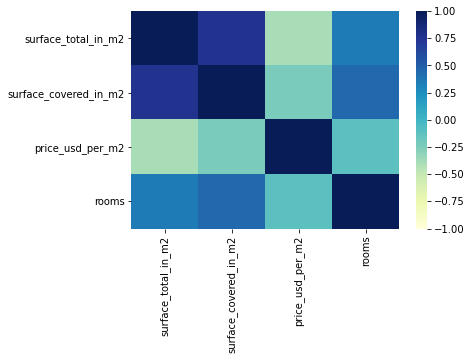

In [3]:
sns.heatmap(data.iloc[:, :4].corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu")

In [4]:
X1 = data[['surface_total_in_m2']]
X2 = data[['surface_covered_in_m2']]
X3 = data[['rooms']]
y = data['price_usd_per_m2']

In [5]:
X1train, X1test, y1train, y1test = train_test_split(X1, y, random_state = 1)
X2train, X2test, y2train, y2test = train_test_split(X2, y, random_state = 1)
X3train, X3test, y3train, y3test = train_test_split(X3, y, random_state = 1)

In [6]:
lm = LinearRegression() # Fiteamos el modelo sobre los vectores X e y.

array([-2.60476694])

2486.650029615513

array([2332.96878008, 2330.36401314, 2127.19219172, ..., 2390.27365279,
       2382.45935197, 2366.83075032])

MAE	700.94
MSE	944445.18
RMSE	971.83
R2	0.16


<AxesSubplot:xlabel='surface_total_in_m2', ylabel='price_usd_per_m2'>

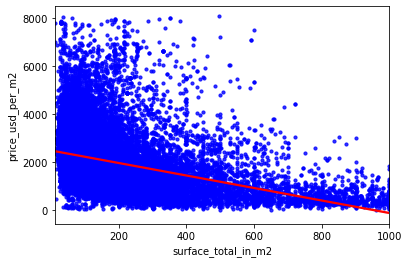

In [7]:
# Superficie total
model1 = lm.fit(X1, y)
model1.coef_
model1.intercept_
test_sklearn_1 = np.array(X1test).reshape(-1,1)
model1.predict(test_sklearn_1)
y1pred = model1.predict(X1test)

print(f'''MAE\t{mean_absolute_error(y1test, y1pred).round(2)}
MSE\t{mean_squared_error(y1test, y1pred).round(2)}
RMSE\t{np.sqrt(mean_squared_error(y1test, y1pred)).round(2)}
R2\t{r2_score(y1test, y1pred).round(2)}''')

sns.regplot(data = data, x = 'surface_total_in_m2', y = 'price_usd_per_m2', ci = 95, scatter_kws = {"color": "blue", 's': 10}, line_kws = {"color": "red"})

array([-2.61384529])

2381.775005041239

array([2258.92427649, 2251.08274062, 2021.06435524, ..., 2290.29041995,
       2277.22119351, 2277.22119351])

MAE	748.4
MSE	1057673.79
RMSE	1028.43
R2	0.06


<AxesSubplot:xlabel='surface_covered_in_m2', ylabel='price_usd_per_m2'>

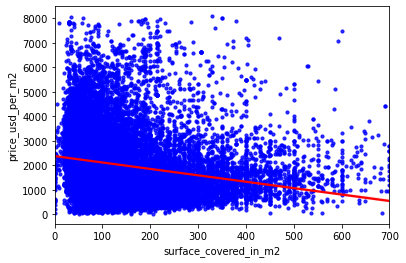

In [8]:
# Superficie cubierta
model2 = lm.fit(X2, y)
model2.coef_
model2.intercept_
test_sklearn_2 = np.array(X2test).reshape(-1,1)
model2.predict(test_sklearn_2)
y2pred = model2.predict(X2test)

print(f'''MAE\t{mean_absolute_error(y2test, y2pred).round(2)}
MSE\t{mean_squared_error(y2test, y2pred).round(2)}
RMSE\t{np.sqrt(mean_squared_error(y2test, y2pred)).round(2)}
R2\t{r2_score(y2test, y2pred).round(2)}''')

sns.regplot(data = data, x = 'surface_covered_in_m2', y = 'price_usd_per_m2', ci = 95, scatter_kws = {"color": "blue", 's': 10}, line_kws = {"color": "red"})

array([-96.71856822])

2353.1539851961998

array([2159.71684875, 2159.71684875, 1869.56114408, ..., 2256.43541697,
       2159.71684875, 2159.71684875])

MAE	781.27
MSE	1109205.16
RMSE	1053.19
R2	0.01


<AxesSubplot:xlabel='rooms', ylabel='price_usd_per_m2'>

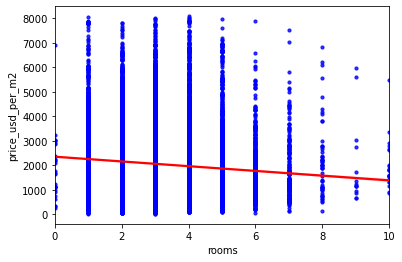

In [9]:
# Habitaciones
model3 = lm.fit(X3, y)
model3.coef_
model3.intercept_
test_sklearn_3 = np.array(X3test).reshape(-1,1)
model3.predict(test_sklearn_3)
y3pred = model3.predict(X3test)

print(f'''MAE\t{mean_absolute_error(y3test, y3pred).round(2)}
MSE\t{mean_squared_error(y3test, y3pred).round(2)}
RMSE\t{np.sqrt(mean_squared_error(y3test, y3pred)).round(2)}
R2\t{r2_score(y3test, y3pred).round(2)}''')

sns.regplot(data = data, x = 'rooms', y = 'price_usd_per_m2', ci = 95, scatter_kws = {"color": "blue", 's': 10}, line_kws = {"color": "red"})